In [1]:
from torchvision import datasets, transforms, utils
from torch.utils import data

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# transform = transforms.Compose([
#     transforms.ToTensor()
#     transforms.Normalize((0.1307,),(0.3081,))
# ])

- Totensor : 이미지를 파이토치 텐서로 변환
- resize : 이미지 크기 조정
- normalize : 평균과 표준편차 이용해서 정규화
- randomHorizontalFlip : 무작위로 이미지의 오른쪽과 왼쪽을 뒤집는 기능
- randomCrop : 이미지를 무작위로 자르는 기능

In [45]:
epochs=50
batch_size =64

In [48]:
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(root = '../data', train=True, download=True,
                         transform = transforms.Compose([
                             transforms.RandomHorizontalFlip(),
                             transforms.ToTensor(),
                             transforms.Normalize((0.1307,),(0.3081,))
                         ])),
    shuffle=True, batch_size=batch_size
)
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST(root = '../data', train=False, download=True,
                         transform = transforms.Compose([
                             transforms.ToTensor(),
                             transforms.Normalize((0.1307,),(0.3081,))
                         ])),
    shuffle=True, batch_size=batch_size
)

In [49]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


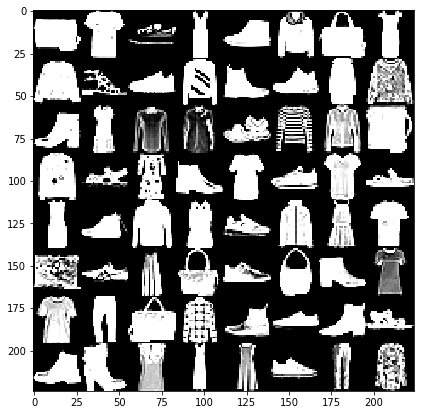

In [50]:
img =utils.make_grid(images,padding=0)
npimg = img.numpy()
plt.figure(figsize=(10,7))
plt.imshow(np.transpose(npimg,(1,2,0)))
plt.show()

In [51]:
print(labels)

tensor([8, 0, 7, 3, 9, 4, 8, 3, 4, 5, 7, 2, 9, 9, 4, 2, 9, 3, 6, 6, 5, 2, 4, 8,
        2, 5, 3, 9, 3, 7, 0, 5, 3, 9, 4, 0, 7, 4, 3, 0, 8, 7, 3, 8, 7, 8, 9, 0,
        0, 1, 8, 6, 9, 7, 9, 5, 9, 9, 6, 3, 3, 7, 1, 6])


In [52]:
CLASSES = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Ban',
    9:'Ankle boot'
    
}

In [53]:
for label in labels:
    index = label.item()
    print(CLASSES[index])

Ban
T-shirt/top
Sneaker
Dress
Ankle boot
Coat
Ban
Dress
Coat
Sandal
Sneaker
Pullover
Ankle boot
Ankle boot
Coat
Pullover
Ankle boot
Dress
Shirt
Shirt
Sandal
Pullover
Coat
Ban
Pullover
Sandal
Dress
Ankle boot
Dress
Sneaker
T-shirt/top
Sandal
Dress
Ankle boot
Coat
T-shirt/top
Sneaker
Coat
Dress
T-shirt/top
Ban
Sneaker
Dress
Ban
Sneaker
Ban
Ankle boot
T-shirt/top
T-shirt/top
Trouser
Ban
Shirt
Ankle boot
Sneaker
Ankle boot
Sandal
Ankle boot
Ankle boot
Shirt
Dress
Dress
Sneaker
Trouser
Shirt


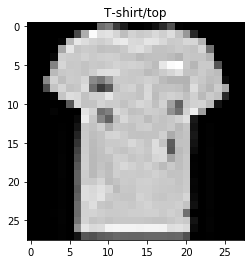

In [54]:
idx = 1
item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
plt.imshow(item_npimg,cmap='gray')
plt.show()

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [56]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

In [67]:
class Linear(nn.Module):
    def __init__(self, in_sz=784, out_sz=10,dropout_p=0.2):
        super(Linear, self).__init__()
        
        
        self.fc1 = nn.Linear(in_sz, 256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,out_sz)
        self.dropout_p = dropout_p
        
    def forward(self, X):
        X = X.view(-1,784)
        X = F.relu(self.fc1(X))
        X = F.dropout(X, p=self.dropout_p,training=self.training)
        X = F.relu(self.fc2(X))
        X = F.dropout(X, p=self.dropout_p,training=self.training)
        X = self.fc3(X)
        
        return X

In [68]:
model = Linear(dropout_p=0.2).to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [69]:
def train(model,train_loader, optimizer):
    model.train()
    for idx , (data,target) in enumerate(train_loader):
        data,target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [70]:
def evaluate(model,test_loader):
    model.eval()
    test_loss=0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data,target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output,target,reduction='sum').item() #한개의 텐서값 가져옴
            pred = output.max(1,keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_acc = 100 * correct / len(test_loader.dataset)
    return test_loss, test_acc

In [71]:
for epoch in range(epochs):
    train(model, train_loader, optimizer)
    test_loss , test_acc = evaluate(model,test_loader)
    
    print('[{}] Test Loss : {:.4f}, acc : {:.2f}%'.format(epoch, test_loss, test_acc))

[0] Test Loss : 0.6418, acc : 77.17%
[1] Test Loss : 0.5402, acc : 80.44%
[2] Test Loss : 0.4868, acc : 82.30%
[3] Test Loss : 0.4570, acc : 83.58%
[4] Test Loss : 0.4386, acc : 84.27%
[5] Test Loss : 0.4358, acc : 84.17%
[6] Test Loss : 0.4191, acc : 84.98%
[7] Test Loss : 0.4046, acc : 85.43%
[8] Test Loss : 0.3934, acc : 85.81%
[9] Test Loss : 0.3919, acc : 85.73%
[10] Test Loss : 0.3887, acc : 85.75%
[11] Test Loss : 0.3759, acc : 86.48%
[12] Test Loss : 0.3717, acc : 86.91%
[13] Test Loss : 0.3713, acc : 86.75%
[14] Test Loss : 0.3699, acc : 86.74%
[15] Test Loss : 0.3614, acc : 86.84%
[16] Test Loss : 0.3569, acc : 87.29%
[17] Test Loss : 0.3607, acc : 86.99%
[18] Test Loss : 0.3505, acc : 87.22%
[19] Test Loss : 0.3481, acc : 87.69%
[20] Test Loss : 0.3496, acc : 87.49%
[21] Test Loss : 0.3461, acc : 87.40%
[22] Test Loss : 0.3462, acc : 87.40%
[23] Test Loss : 0.3608, acc : 86.71%
[24] Test Loss : 0.3453, acc : 87.57%
[25] Test Loss : 0.3473, acc : 87.37%
[26] Test Loss : 0.337